In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [2]:
ALIGNERS_NAMES_MAPPING = {
    'None': 'None',
    'ProcrustesUnchanged': 'PUA',
    'FILDNEPercent': 'FA',
    'Procrustes': 'PA',
    'TemporalBetweenness': 'TB',
    'TemporalCloseness': 'TC',
    'EdgeJaccardPercent': 'EJA',
    'TemporalDegreeDeviation': 'TDD',
    'TemporalKShellScore': 'TK',
    'EmbeddingNeighborJaccardPercent': 'ENJA',
}

In [3]:
data = pd.read_pickle('../data/metrics/all_aligner_metrics_fixed_v2.pkl')
df = pd.DataFrame.from_dict(data, orient='index')


In [4]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.reset_index()
df.columns = ['Dataset', 'Aligner', 'ped', 'SSD', 'RND', 'RND_2']
df['Aligner'] = df.apply(
    lambda x: ALIGNERS_NAMES_MAPPING[x['Aligner']],
    axis=1
)
df
rnd_df = df[['Dataset', 'Aligner', 'RND']].set_index(['Dataset', 'Aligner'])
rnd_df = rnd_df.apply(
    lambda x: pd.Series(x['RND']),
    axis=1
)
rnd_df = rnd_df.reset_index().melt(id_vars=['Dataset', 'Aligner'],value_name='RND', var_name='run')
rnd_df['method'] = 'Aligned Embeddings'

rnd_df_2 = df[['Dataset', 'Aligner', 'RND_2']].set_index(['Dataset', 'Aligner'])
rnd_df_2 = rnd_df_2.apply(
    lambda x: pd.Series(x['RND_2']),
    axis=1
)
rnd_df_2 = rnd_df_2.reset_index().melt(id_vars=['Dataset', 'Aligner'],value_name='RND', var_name='run')
rnd_df_2['method'] = 'Not Aligned Embeddings'


In [5]:
rnd_dfc = pd.concat([rnd_df.set_index(['Dataset', 'Aligner', 'run']), 
                     rnd_df_2.set_index(['Dataset', 'Aligner', 'run'])], axis=0)

In [6]:
rnd_dfc

RND                  method
Dataset      Aligner run                                  
ia-hypertext PA      0    1.853003      Aligned Embeddings
             PUA     0         NaN      Aligned Embeddings
             FA      0    1.745235      Aligned Embeddings
             EJA     0    1.383308      Aligned Embeddings
             ENJA    0    1.802062      Aligned Embeddings
...                            ...                     ...
ogbl-collab  ENJA    24   9.906112  Not Aligned Embeddings
             TB      24   9.959958  Not Aligned Embeddings
             TC      24   9.956755  Not Aligned Embeddings
             TK      24   9.952959  Not Aligned Embeddings
             TDD     24   9.952959  Not Aligned Embeddings

[4050 rows x 2 columns]

In [7]:
rnd_dfc = rnd_dfc.reset_index()

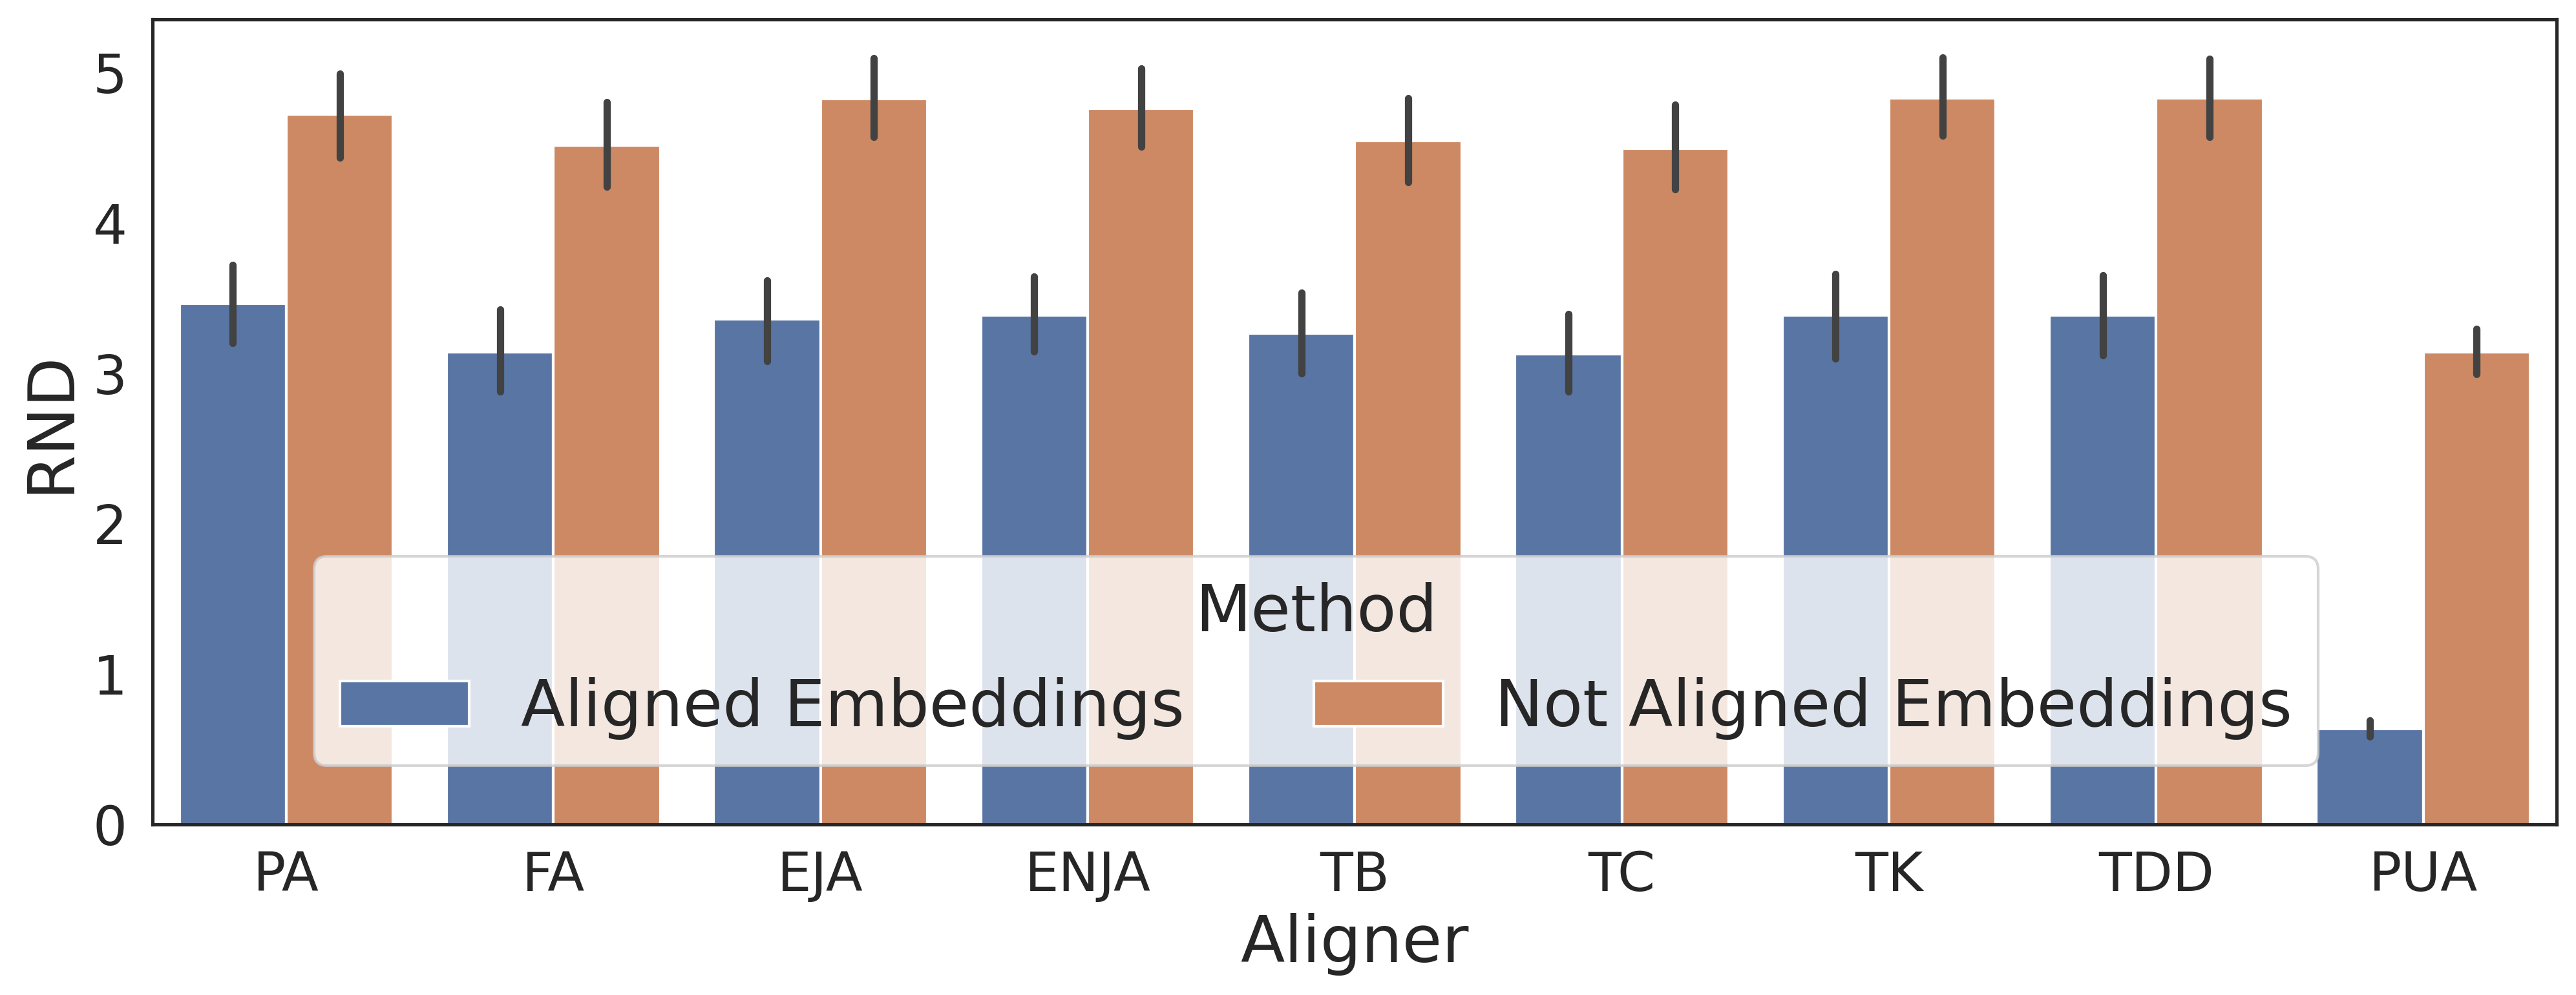

In [8]:
label_fontsize = 24
sns.set(
    rc={
        'font.size':label_fontsize,
        'axes.titlesize':label_fontsize,
        'axes.labelsize':label_fontsize,
        'axes.labelweight': 'normal',
        'legend.fontsize':label_fontsize,
        'figure.dpi': 300,
    }, 
    style='white'
)
fig, ax = plt.subplots(figsize=(16,5.5))
sns.barplot(
    data=rnd_dfc.dropna(),
    x='Aligner',
    hue='method',
    y='RND',    
)
handles, labels = ax.get_legend_handles_labels()
ax.legend([],[], frameon=False)
legend = fig.legend(
    handles, 
    labels, 
    loc='lower center',
    ncol=4,
    bbox_to_anchor=(0.5, 0.15),
    title='Method'
)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.setp(legend.get_title(),fontsize=label_fontsize)
plt.savefig('rnd_metric.png')
plt.show()